# <font color='green' style='font-size: 30px;'>Análise exploratória dos registros de acidentes ambientais reportados ao IBAMA</font>


## Descrição e objetivos

O Sistema Nacional de Emergências Ambientais (Siema) é o repositório oficial do Instituto Brasileiro do Meio Ambiente e dos Recursos Naturais Renováveis (IBAMA). Neste repositório, são encontrados os registros dos acidentes ambientais ocorridos no Brasil e reportados ao IBAMA.

O presente projeto procurou explorar esta base de dados para gerar interpretações acerca destas ocorrências e potencialmente informar ações de enfrentamento aos acidentes ambientais no Brasil.

#### Fonte dos dados

Os dados foram recolhidos junto ao Sistema Nacional de Emergências Ambientais (Siema) - https://dados.gov.br/dataset/siema-comunicado-de-acidente-ambiental (download em 09/11/2022).

### Importando bibliotecas relevantes

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

### Carregando dados e construindo DataFrame adequado

In [3]:
dados_brutos = pd.read_csv('Dados/comunicados_acidentes.csv')
dados_brutos.head(20)

C:\Users\Gabriel Garcia\AppData\Local\Temp\ipykernel_14172\2741348918.py:1: DtypeWarning: Columns (11,23) have mixed types. Specify dtype option on import or set low_memory=False.
  dados_brutos = pd.read_csv('Dados/comunicados_acidentes.csv')


,FID,uuid,id_ocorrencia,id_municipio,id_uf,id_responsavel,des_complemento_tipo_localizaca,des_complemento_tipo_evento,des_complemento_instituicao_atu,des_complemento_tipo_dano_ident,...,dia_semana_primeira_obs,dia_semana_registro,institiuicoes_atuando_local,tipos_fontes_informacoes,tipos_danos_identificados,produtos_onu,produtos_outro,geom,dt_carga,feicao_proxima
0,adm_comunicacidente_p.fid--4a928607_1845af9d20...,58852510-e800-4d5b-8cec-e2a6e9a37748,312,2706901.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Corpo de Bombeiros;Polícia Rodoviária,Mídia,Óbitos/feridos,NaN,NaN,POINT (-35.9511275 -9.6016711),2022-09-27T20:44:12,NaN
1,adm_comunicacidente_p.fid--4a928607_1845af9d20...,2ea84fdc-4bd7-40ab-aeb5-06426572d339,313,3205309.0,8.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Corpo de Bombeiros,Mídia,Outro(s),NaN,NaN,POINT (-40.3016327 -20.2996826),2022-09-27T20:44:12,NaN
2,adm_comunicacidente_p.fid--4a928607_1845af9d20...,29be7ae3-3190-4b40-bdfe-a0516bf20ac1,314,5003702.0,12.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Outra(s),Mídia,Fauna;Flora;População afetada/evacuada;Rio/cór...,NaN,NaN,POINT (-54.812208 -22.2206145),2022-09-27T20:44:12,NaN
3,adm_comunicacidente_p.fid--4a928607_1845af9d20...,d896a564-adba-4332-86d0-595c1a7548c7,315,NaN,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Corpo de Bombeiros;Defesa Civil,Mídia,Solo,NaN,NaN,POINT (-47.9768478 -15.82326),2022-09-27T20:44:12,NaN
4,adm_comunicacidente_p.fid--4a928607_1845af9d20...,40c5a5be-23bd-40d9-8106-a086c5433b67,316,4312054.0,21.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Outra(s),Mídia,Rio/córrego;Solo,NaN,NaN,POINT (-52.097268 -29.331113),2022-09-27T20:44:12,NaN
5,adm_comunicacidente_p.fid--4a928607_1845af9d20...,7f4e00c0-d990-410a-b216-ca1050239ebb,317,5002704.0,12.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Corpo de Bombeiros,Mídia,Atmosfera;Outro(s);População afetada/evacuada,NaN,NaN,POINT (-54.6239059 -20.4704658),2022-09-27T20:44:12,NaN
6,adm_comunicacidente_p.fid--4a928607_1845af9d20...,6b58bc2d-aded-4bee-a8ae-dffc8f2aa4c1,318,4322707.0,21.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Outra(s),Mídia,Fauna;Rio/córrego,NaN,NaN,POINT (-52.515176 -29.718435),2022-09-27T20:44:12,NaN
7,adm_comunicacidente_p.fid--4a928607_1845af9d20...,1588483e-076b-40cf-a095-52b601047d73,319,4301701.0,21.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,IBAMA;Outra(s),Mídia,Flora,NaN,NaN,POINT (-52.37982 -27.620785),2022-09-27T20:44:12,NaN
8,adm_comunicacidente_p.fid--4a928607_1845af9d20...,0066550c-7695-4231-84d3-6d117a081c16,320,5300108.0,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Corpo de Bombeiros;Defesa Civil;Outra(s);Políc...,Mídia,Atmosfera,NaN,NaN,POINT (-47.882664 -15.7941211),2022-09-27T20:44:12,NaN
9,adm_comunicacidente_p.fid--4a928607_1845af9d20...,157bd7de-3362-4b72-93b5-db40a01795ba,321,4309209.0,21.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Outra(s);Polícia Rodoviária,Mídia,Outro(s),NaN,NaN,POINT (-50.992465 -29.941282),2022-09-27T20:44:12,NaN


In [4]:
dados_brutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 68 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   FID                              12970 non-null  object 
 1   uuid                             12970 non-null  object 
 2   id_ocorrencia                    12970 non-null  int64  
 3   id_municipio                     10548 non-null  float64
 4   id_uf                            12263 non-null  float64
 5   id_responsavel                   6316 non-null   float64
 6   des_complemento_tipo_localizaca  3825 non-null   object 
 7   des_complemento_tipo_evento      3630 non-null   object 
 8   des_complemento_instituicao_atu  4628 non-null   object 
 9   des_complemento_tipo_dano_ident  3263 non-null   object 
 10  des_danos                        0 non-null      float64
 11  des_ocorrencia                   5775 non-null   object 
 12  dt_ocorrencia     

### Investigando a distribuição espacial dos acidentes - recorte por estado (UF)

In [6]:
# Criando DataFrame com número de ocorrências por estado

dados_brutos['uf'].unique()
s_uf = dados_brutos['uf'].value_counts()
s_uf.name = 'Total de ocorrências'
s_uf

MG    3313
SP    2334
RJ    2041
PR     626
BA     510
RS     497
SC     425
ES     406
SE     221
MS     213
DF     200
GO     188
CE     174
RN     139
MT     137
MA     137
AM     128
AL     123
PA     110
PE      88
TO      59
RO      49
PB      48
PI      37
AP      12
RR       8
AC       6
Name: Total de ocorrências, dtype: int64

In [7]:
# Calculando a contribuição percentual de cada estado

total_uf = s_uf.sum() 
s_percent = round(s_uf * 100 / total_uf, 1)
s_percent

MG    27.1
SP    19.1
RJ    16.7
PR     5.1
BA     4.2
RS     4.1
SC     3.5
ES     3.3
SE     1.8
MS     1.7
DF     1.6
GO     1.5
CE     1.4
RN     1.1
MT     1.1
MA     1.1
AM     1.0
AL     1.0
PA     0.9
PE     0.7
TO     0.5
RO     0.4
PB     0.4
PI     0.3
AP     0.1
RR     0.1
AC     0.0
Name: Total de ocorrências, dtype: float64

In [8]:
# Criando DataFrame combinado

dados_uf = pd.DataFrame(s_uf) 
dados_uf['Percentual'] = s_percent
dados_uf

,Total de ocorrências,Percentual
MG,3313,27.1
SP,2334,19.1
RJ,2041,16.7
PR,626,5.1
BA,510,4.2
RS,497,4.1
SC,425,3.5
ES,406,3.3
SE,221,1.8
MS,213,1.7


##### Imprimindo observação inicial (os 3 estados com mais ocorrências)

In [10]:
top_3_abs = round(dados_uf['Total de ocorrências'].iloc[0:3].sum(axis=0))
top_3_percent = round(dados_uf['Percentual'].iloc[0:3].sum(axis=0))
print("Os estados de Minas Gerais, São Paulo e Rio de Janeiro tiveram o total de {} ocorrências,".format(top_3_abs)
      + "\nrepresentando aproximadamente {}% dos acidentes ambientais no Brasil reportados ao IBAMA.".format(top_3_percent))

Os estados de Minas Gerais, São Paulo e Rio de Janeiro tiveram o total de 7688 ocorrências,
representando aproximadamente 63% dos acidentes ambientais no Brasil reportados ao IBAMA.


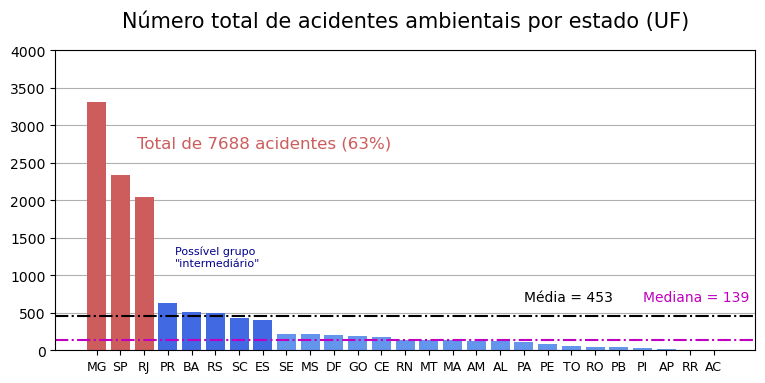

In [11]:
# Visualizando o total de ocorrências por estado (por meio de gráfico de barras)

fig = plt.figure(figsize=(7,3))
eixo = fig.add_axes([0,0,1,1])

cores = ['indianred', 'indianred', 'indianred', 'royalblue','royalblue','royalblue','royalblue','royalblue',
          'cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue',
         'cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue',
         'cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue',
         'cornflowerblue','cornflowerblue']

media = round(dados_uf['Total de ocorrências'].mean())
mediana = round(dados_uf['Total de ocorrências'].median())

eixo.bar(dados_uf.index, dados_uf['Total de ocorrências'], color = cores, zorder=2)
eixo.set_title('Número total de acidentes ambientais por estado (UF)', fontsize = 15, pad = 17)
#eixo.set_ylabel('Número total de acidentes reportados', fontsize = 10) ---> considerado desnecessário
eixo.set_xticks(dados_uf.index)
eixo.set_xticklabels(dados_uf.index, fontsize = 9)
eixo.set_ylim(0, 4000)
eixo.grid(True, axis = 'y', linestyle = '-', lw = '0.8', zorder=1)

eixo.annotate('Total de {} acidentes ({}%)'.format(top_3_abs, top_3_percent),
              fontsize = 12, color = 'indianred', xy = (1.7,2700))

eixo.axhline(media, linestyle = '-.', color = 'k')
eixo.annotate('Média = {}'.format(media, ), color = 'k', xy = (18, media + 200), fontsize = 10)

eixo.axhline(mediana, linestyle = '-.', color = 'm')
eixo.annotate('Mediana = {}'.format(mediana, ), color = 'm', xy = (23, media + 200), fontsize = 10)

eixo.annotate('Possível grupo\n"intermediário"', color = 'darkblue', xy = (3.3, media + 670), fontsize = 8)

fig.savefig('Total de acidentes por estado.png', bbox_inches = 'tight')

#### Observações da distribuição espacial por recorte estadual

Três estados se destacam por apresentar números totais de acidentes ambientais muito superiores tanto à média nacional quanto aos demais estados. Dentro deste grupo, Minas Gerais é os estado com mais acidentes registrados (3313), seguido por São Paulo (2334) e rio de Janeiro (2042). Juntos, estes estados representaram cerca de 63% de todos os acidentes registrados no Brasil.

Com a representação visual pelo gráfico de barras, outro grupo de estados aparenta se distinguir dos demais. Paraná, Bahia, Rio Grande do Sul, Santa Catarina e Espírito Santo apresentaram números totais de acidentes muito semelhantes entre si, próximos à média e aparentemente distintos do restante dos estados.

Tais padrões de distribuição podem ajudar a inferir sobre os macanismos causadores de acidentes e a sugerir medidas preventivas, por exemplo, como políticas públicas direcionadas a regiões de maior incidência de acidentes.

### Investigando a distribuição espacial dos acidentes - recorte por município de MG, SP e RJ

### Minas Gerais

In [12]:
# Agrupamento utilizando groupby()

dados_gb = dados_brutos.groupby('uf')

s_mg = dados_gb.get_group('MG')['municipio'].dropna().value_counts()
s_mg.name = 'Total de ocorrências'
df_mg = pd.DataFrame(s_mg)
df_mg.head(20)

,Total de ocorrências
Belo Horizonte,112
Uberaba,90
Betim,74
Uberlândia,67
Carmo da Cachoeira,56
Lavras,55
Araxá,49
Pouso Alegre,48
Extrema,43
Oliveira,42


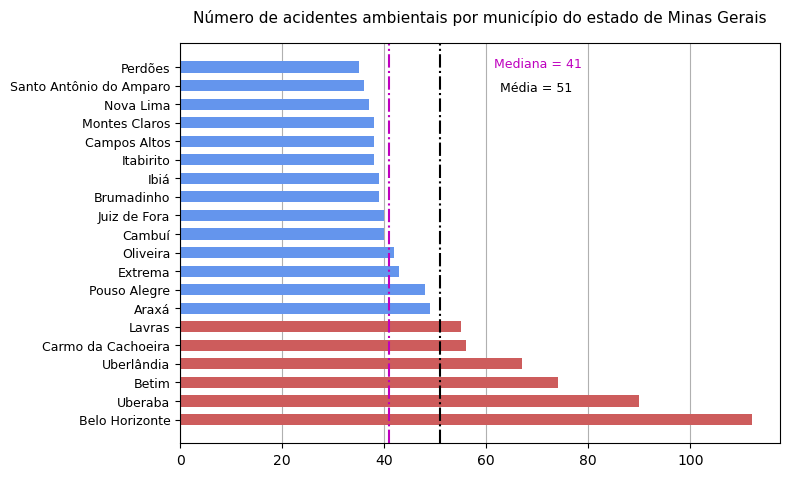

In [13]:
# Visualizando o total de ocorrências por município de Minas Gerais (por meio de gráfico de barras)

fig = plt.figure(figsize=(6,4))
eixo = fig.add_axes([0,0,1,1])

df_mg_lim20 = df_mg.iloc[0:20]

cores_mg20 = ['indianred','indianred','indianred','indianred','indianred','indianred',
              'cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue',
              'cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue',
              'cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue']

media_mg20 = round(df_mg_lim20['Total de ocorrências'].mean())
mediana_mg20 = round(df_mg['Total de ocorrências'][0:20].median()) #Utilizando filtro ao invés de .iloc

eixo.barh(df_mg_lim20.index, df_mg_lim20['Total de ocorrências'], color = cores_mg20 , height = 0.6, zorder = 2)
eixo.set_title('Número de acidentes ambientais por município do estado de Minas Gerais', fontsize = 11, pad = 15)
eixo.set_yticks(df_mg_lim20.index)
eixo.set_yticklabels(df_mg_lim20.index, fontsize = 9)
eixo.grid(visible = True, which = 'major', axis = 'x', zorder = 1, ls = '-', lw = '0.8')

eixo.axvline(media_mg20, linestyle = '-.', color = 'k')
eixo.annotate('Média = {}'.format(media_mg20), color = 'k', xy = (media_mg20 + 11.7, 17.7), fontsize = 9)

eixo.axvline(mediana_mg20, linestyle = '-.', color = 'm')
eixo.annotate('Mediana = {}'.format(mediana_mg20), color = 'm', xy = (media_mg20 + 10.5, 19), fontsize = 9)

fig.savefig('Total por municio (20) MG.png', bbox_inches = 'tight')

### São Paulo

In [14]:
# Novo agrupamento por estado, agora por aplicação de filtro

filtro_sp = dados_brutos['uf'] == 'SP'

s_sp = dados_brutos['municipio'][filtro_sp].dropna().value_counts()
s_sp.name = 'Total de ocorrências'
df_sp = pd.DataFrame(s_sp)
df_sp.head(20)

,Total de ocorrências
São Paulo,250
Santos,170
Ribeirão Preto,66
Sorocaba,47
Araras,40
São José dos Campos,39
Cubatão,36
Bauru,36
São Sebastião,35
Guarujá,33


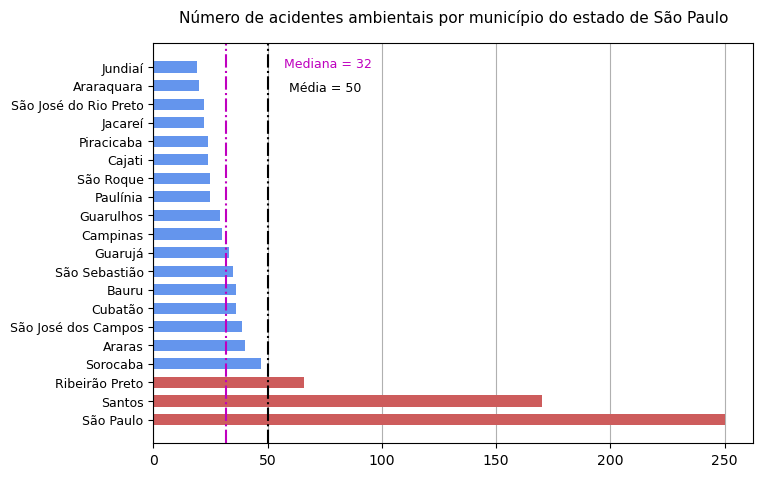

In [15]:
# Visualizando o total de ocorrências por município de São Paulo (por meio de gráfico de barras)

fig = plt.figure(figsize=(6,4))
eixo = fig.add_axes([0,0,1,1])

df_sp_lim20 = df_sp.iloc[0:20]

cores_sp20 = ['indianred','indianred','indianred','cornflowerblue','cornflowerblue','cornflowerblue',
              'cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue',
              'cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue',
              'cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue']

media_sp20 = round(df_sp_lim20['Total de ocorrências'].mean())
mediana_sp20 = round(df_sp_lim20['Total de ocorrências'].median())

eixo.barh(df_sp_lim20.index, df_sp_lim20['Total de ocorrências'], color = cores_sp20, height = 0.6, zorder = 2)
eixo.set_title('Número de acidentes ambientais por município do estado de São Paulo', fontsize = 11, pad = 15)
eixo.set_yticks(df_sp_lim20.index)
eixo.set_yticklabels(df_sp_lim20.index, fontsize = 9)
eixo.grid(visible = True, which = 'major', axis = 'x', zorder = 1, ls = '-', lw = '0.8')

eixo.axvline(media_sp20, linestyle = '-.', color = 'k')
eixo.annotate('Média = {}'.format(media_sp20), color = 'k', xy = (media_sp20 + 9.2, 17.7), fontsize = 9)
eixo.axvline(mediana_sp20, linestyle = '-.', color = 'm')
eixo.annotate('Mediana = {}'.format(mediana_sp20), color = 'm', xy = (media_sp20 + 7, 19), fontsize = 9)

fig.savefig('Total por municio (20) SP.png', bbox_inches = 'tight')

### Rio de Janeiro

In [16]:
# Agrupamento por estado por aplicação de filtro

filtro_rj = dados_brutos['uf'] == 'RJ'

s_rj = dados_brutos['municipio'][filtro_rj].dropna().value_counts()
s_rj.name = 'Total de ocorrências'
df_rj = pd.DataFrame(s_rj)
df_rj.head(20)

,Total de ocorrências
Macaé,289
Rio de Janeiro,249
Duque de Caxias,64
Niterói,61
Piraí,41
Petrópolis,28
São João da Barra,24
Barra Mansa,22
Campos dos Goytacazes,20
Angra dos Reis,20


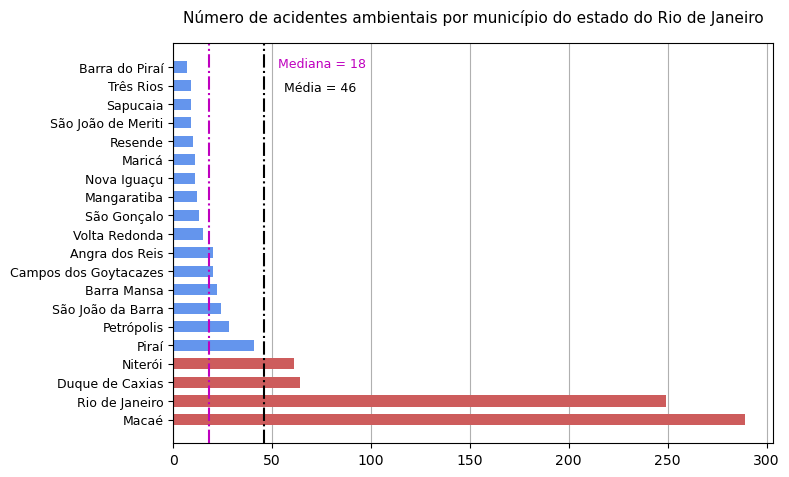

In [17]:
# Visualizando o total de ocorrências por município do Rio de Janeiro (por meio de gráfico de barras)

fig = plt.figure(figsize=(6,4))
eixo = fig.add_axes([0,0,1,1])

df_rj_lim20 = df_rj.iloc[0:20]

cores_rj20 = ['indianred','indianred','indianred','indianred','cornflowerblue','cornflowerblue','cornflowerblue',
              'cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue',
              'cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue',
              'cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue']

media_rj20 = round(df_rj_lim20['Total de ocorrências'].mean())
mediana_rj20 = round(df_rj_lim20['Total de ocorrências'].median())

eixo.barh(df_rj_lim20.index, df_rj_lim20['Total de ocorrências'], color = cores_rj20, height = 0.6, zorder = 2)
eixo.set_title('Número de acidentes ambientais por município do estado do Rio de Janeiro', fontsize = 11, pad = 15)
eixo.set_yticks(df_rj_lim20.index)
eixo.set_yticklabels(df_rj_lim20.index, fontsize = 9)
eixo.grid(visible = True, which = 'major', axis = 'x', zorder = 1, ls = '-', lw = '0.8')

eixo.axvline(media_rj20, linestyle = '-.', color = 'k')
eixo.annotate('Média = {}'.format(media_rj20, ), color = 'k', xy = (media_rj20 + 10, 17.7), fontsize = 9)

eixo.axvline(mediana_rj20, linestyle = '-.', color = 'm')
eixo.annotate('Mediana = {}'.format(mediana_rj20, ), color = 'm', xy = (media_rj20 + 7, 19), fontsize = 9)

fig.savefig('Total por municio (20) RJ.png', bbox_inches = 'tight')

### Comparando a distribuição de acidentes entre os estados de Minas Gerais, São Paulo e Rio de Janeiro

In [18]:
# Construindo novo DataFrame com os dados dos 20 primeiros municípios de MG, SP e RJ

df_mg_lim20.index = range(df_mg_lim20.shape[0])
df_sp_lim20.index = range(df_mg_lim20.shape[0])
df_rj_lim20.index = range(df_mg_lim20.shape[0])

dados_mun3 = pd.DataFrame()

dados_mun3['MG'] = df_mg_lim20['Total de ocorrências']
dados_mun3['SP'] = df_sp_lim20['Total de ocorrências']
dados_mun3['RJ'] = df_rj_lim20['Total de ocorrências']

dados_mun3

,MG,SP,RJ
0,112,250,289
1,90,170,249
2,74,66,64
3,67,47,61
4,56,40,41
5,55,39,28
6,49,36,24
7,48,36,22
8,43,35,20
9,42,33,20


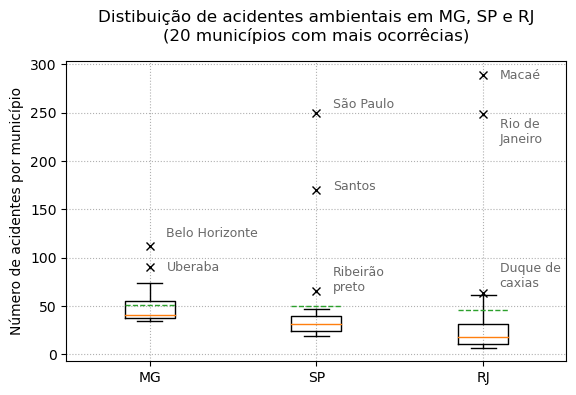

In [19]:
# Visualizando a distribuição das ocorrências por município dos três estados com maior número de ocorrências
# (por meio de gráfico de caixas)

fig = plt.figure(figsize = (5,3))
eixo = fig.add_axes([0,0,1,1])

caixas = eixo.boxplot(dados_mun3, meanline = True, showmeans = True, labels = dados_mun3.columns, zorder = 2)
eixo.set_title('Distibuição de acidentes ambientais em MG, SP e RJ\n(20 municípios com mais ocorrêcias)',
               fontsize = 12, pad = 15)
eixo.set_ylabel('Número de acidentes por município', fontsize = 10)
eixo.grid(visible = True, zorder = 1, ls = ':', lw = '0.8')

for outlier in caixas['fliers']:
    outlier.set(marker='x', markersize=6)
    
sp_y = dados_mun3['SP'][0]
eixo.annotate('São Paulo', color = 'dimgrey', xy = (2.1, sp_y+5), fontsize = 9)

santos_y = dados_mun3['SP'][1]
eixo.annotate('Santos', color = 'dimgrey', xy = (2.1, santos_y), fontsize = 9)

rib_y = dados_mun3['SP'][2]
eixo.annotate('Ribeirão\npreto', color = 'dimgrey', xy = (2.1, rib_y), fontsize = 9)

macae_y = dados_mun3['RJ'][0]
eixo.annotate('Macaé', color = 'dimgrey', xy = (3.1, macae_y-4), fontsize = 9)

rio_y = dados_mun3['RJ'][1]
eixo.annotate('Rio de\nJaneiro', color = 'dimgrey', xy = (3.1, rio_y-30), fontsize = 9)

duq_y = dados_mun3['RJ'][2]
eixo.annotate('Duque de\ncaxias', color = 'dimgrey', xy = (3.1, duq_y+6), fontsize = 9)

bh_y = dados_mun3['MG'][0]
eixo.annotate('Belo Horizonte', color = 'dimgrey', xy = (1.1, bh_y+10), fontsize = 9)

uberaba_y = dados_mun3['MG'][1]
eixo.annotate('Uberaba', color = 'dimgrey', xy = (1.1, uberaba_y-4), fontsize = 9)


fig.savefig('Box-plot distribuição MG, SP, RJ.png', bbox_inches = 'tight')

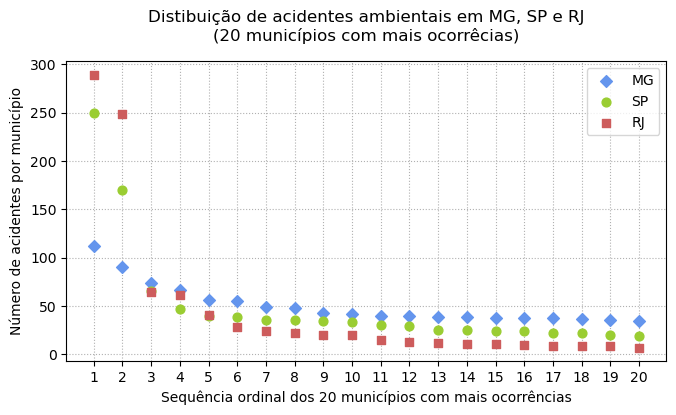

In [20]:
# Visualizando a distribuição das ocorrências por município dos três estados com maior número de ocorrências
# (por meio de gráfico de dispersão)

fig = plt.figure(figsize = (6,3))
eixo = fig.add_axes([0,0,1,1])

ordem = range(1,21)

eixo.scatter(ordem, dados_mun3['MG'], marker = 'D', c = 'cornflowerblue', zorder = 2)
eixo.scatter(ordem, dados_mun3['SP'], marker = 'o', c = 'yellowgreen', s = 40, zorder = 3)
eixo.scatter(ordem, dados_mun3['RJ'], marker = 's', c = 'indianred', zorder = 4)

eixo.set_title('Distibuição de acidentes ambientais em MG, SP e RJ\n(20 municípios com mais ocorrêcias)',
               fontsize = 12, pad = 15)
eixo.set_ylabel('Número de acidentes por município', fontsize = 10)
eixo.set_xlabel('Sequência ordinal dos 20 municípios com mais ocorrências')
eixo.set_xticks(ordem)
eixo.grid(visible = True, lw = '0.8', ls = ':', zorder = 1)
eixo.legend(dados_mun3.columns)

fig.savefig('Dispersão dos acidentes em MG, SP e RJ.png', bbox_inches = 'tight')

## Investigando as causas dos acidentes
### Construindo nuvens de palavras com as descrições de todas as ocorrências

In [22]:
#Criando DataFrame com as descrições das ocorrências

descr = pd.DataFrame(dados_brutos['des_ocorrencia'].dropna())
descr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5775 entries, 0 to 5774
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   des_ocorrencia  5775 non-null   object
dtypes: object(1)
memory usage: 90.2+ KB


In [23]:
# Convertendo Series de object para string

descr['des_ocorrencia'] = descr['des_ocorrencia'].astype('string')
descr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5775 entries, 0 to 5774
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   des_ocorrencia  5775 non-null   string
dtypes: string(1)
memory usage: 90.2 KB


In [24]:
# Salvando as strings em arquivo .txt

descr['des_ocorrencia'].to_csv('Descrição_das_ocorrências.txt', ',', index=False)

In [25]:
# Lendo arquivo .txt (foi necessário especificar encoding)

des_ocorr = open('Descrição_das_ocorrências.txt', 'r', encoding='utf-8').read()

In [26]:
# Criando lista com stopwords em português, relevantes ao texto

stopwords = ['de', 'e', 'um', 'houve', 'do', 'o', 'em', 'a', 'com', 'que', 'no', 'na', 'da', 'para', 'por', 'uma']

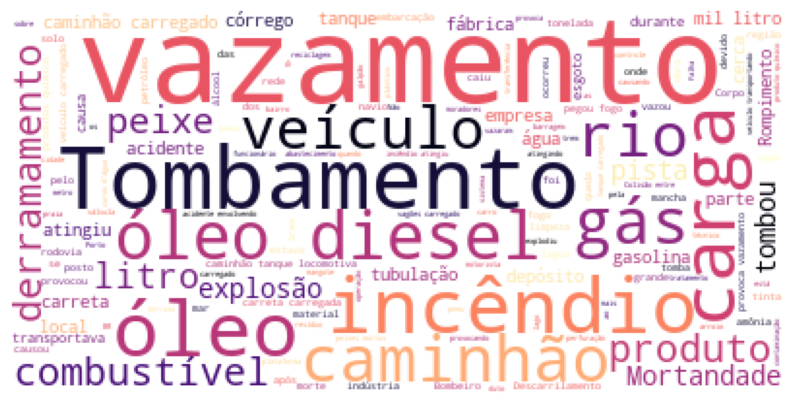

In [136]:
# Criando wordcloud

ocorrencias = plt.figure(figsize=(10,6))

descr_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords,
    colormap='magma',
).generate(des_ocorr)

plt.imshow(descr_wc)
plt.axis('off')
plt.show()

ocorrencias.savefig('Descrição_das_ocorrências_wc.png', bbox_inches = 'tight')

### Construindo nuvens de palavras com as descrições das as ocorrências de Macaé e Santos

In [27]:
#Criando DataFrame com as descrições das ocorrências de Macaé

filtro_macae = (dados_brutos['municipio'] == 'Macaé')

descr_macae = pd.DataFrame(dados_brutos['des_ocorrencia'][filtro_macae])
descr_macae['des_ocorrencia'] = descr_macae['des_ocorrencia'].astype('string')
descr_macae.info()
descr_macae.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 12 to 12966
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   des_ocorrencia  161 non-null    string
dtypes: string(1)
memory usage: 4.5 KB


(289, 1)

In [28]:
#Criando DataFrame com as descrições das ocorrências de Santos

filtro_santos = (dados_brutos['municipio'] == 'Santos')

descr_santos = pd.DataFrame(dados_brutos['des_ocorrencia'][filtro_santos])
descr_santos['des_ocorrencia'] = descr_santos['des_ocorrencia'].astype('string')
descr_santos.info()
descr_santos.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 143 to 12926
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   des_ocorrencia  76 non-null     string
dtypes: string(1)
memory usage: 2.7 KB


(170, 1)

In [29]:
# Salvando as strings em arquivo .txt

descr_macae['des_ocorrencia'].to_csv('Descrição_das_ocorrências_macae.txt', ',', index=False)
descr_santos['des_ocorrencia'].to_csv('Descrição_das_ocorrências_santos.txt', ',', index=False)

In [30]:
# Lendo arquivo .txt (foi necessário especificar encoding)

des_ocorr_macae = open('Descrição_das_ocorrências_macae.txt', 'r', encoding='utf-8').read()
des_ocorr_santos = open('Descrição_das_ocorrências_santos.txt', 'r', encoding='utf-8').read()

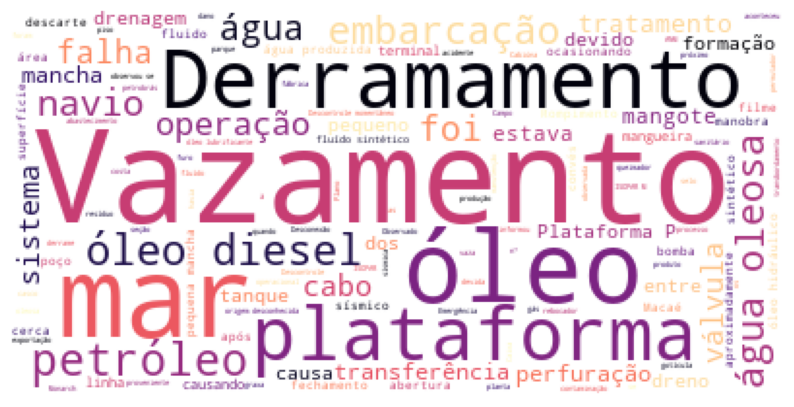

In [141]:
# Criando wordcloud, Macaé

ocorrencias_macae = plt.figure(figsize=(10,6))

stopwords2 = ['de', 'e', 'um', 'houve', 'do', 'o', 'em', 'a', 'com', 'que', 'no', 'na', 'da', 'para', 'por', 'uma',
             'Durante', 'pelo','pela', 'ao', 'um', 'litro', 'mil litro', 'litros', 'Santos', 'ocorreu']

descr_macae_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords2,
    colormap = 'magma',
).generate(des_ocorr_macae)

plt.imshow(descr_macae_wc)
plt.axis('off')
plt.show()

ocorrencias_macae.savefig('Descrição_das_ocorrências_Macae_wc.png', bbox_inches = 'tight')

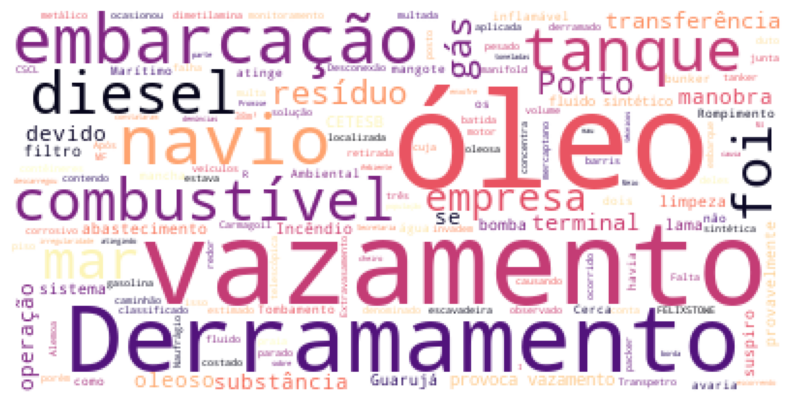

In [142]:
# Criando wordcloud, Santos

ocorrencias_santos = plt.figure(figsize=(10,6))

descr_santos_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords2,
    colormap = 'magma',
).generate(des_ocorr_santos)

plt.imshow(descr_santos_wc)
plt.axis('off')
plt.show()

ocorrencias_santos.savefig('Descrição_das_ocorrências_Santos_wc.png', bbox_inches = 'tight')

### Investigando a correlação com indicadores socioeconômicos

Para essa investigação inicial, utilizaram-se os indicadores socioeconômicos municipais disponibilizados pelo Instituto Brasileiro de Geografia e Estatística (IBGE).

Os dados utilizadas estão disponíveis em: https://www.ibge.gov.br/estatisticas/downloads-estatisticas.html (download em 14/12/2022).

In [31]:
# Lendo novas bases de dados e criando novos DataFrames

pib_municipios_raiz = pd.read_excel('Dados/PIB dos Municípios - base de dados 2010-2019.xls')
pib_municipios_raiz.head()

,Ano,Sigla da Unidade da Federação,Nome da Unidade da Federação,Nome do Município,Nome Arranjo Populacional,Hierarquia Urbana,Hierarquia Urbana (principais categorias),"Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)","Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)",Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto
0,2010,RO,Rondônia,Alta Floresta D'Oeste,NaN,Centro Local,Centro Local,69260.391,16118.534,62496.185,93244.656,241119.767,20957.111,262076.878,10731.18,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária",Demais serviços
1,2010,RO,Rondônia,Ariquemes,NaN,Centro Subregional B,Centro Subregional,73711.643,287138.585,494946.267,343867.731,1199664.227,165029.553,1364693.780,15103.86,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...
2,2010,RO,Rondônia,Cabixi,NaN,Centro Local,Centro Local,24300.822,3252.506,12677.210,25170.235,65400.772,4210.342,69611.114,11033.62,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária",Demais serviços
3,2010,RO,Rondônia,Cacoal,NaN,Centro Subregional B,Centro Subregional,95259.203,182051.537,465447.325,298454.309,1041212.374,145281.717,1186494.091,15095.15,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...
4,2010,RO,Rondônia,Cerejeiras,NaN,Centro de Zona B,Centro de Zona,28976.415,19734.484,80724.991,63018.270,192454.160,29567.029,222021.189,13037.06,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...


In [32]:
pib_municipios_raiz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55685 entries, 0 to 55684
Data columns (total 18 columns):
 #   Column                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                             --------------  -----  
 0   Ano                                                                                                                                                55685 non-null  int64  
 1   Sigla da Unidade da Federação                                                                                                                      55685 non-null  object 
 2   Nome da Unidade da Federação                                                                                                                       55685 non-null  object 
 3   Nome d

In [33]:
# Criando novo DF com variáveis relevantes para MG, SP e RJ

pib_municipios = pib_municipios_raiz.iloc[:,[0,1,3,13,14,15]]

pib_municipios.columns = ['Ano',
                          'UF',
                          'Município',
                          'PIB',
                          'PIB per capita',
                          '1a atividade'
                          ]

pib_municipios.head()

,Ano,UF,Município,PIB,PIB per capita,1a atividade
0,2010,RO,Alta Floresta D'Oeste,262076.878,10731.18,"Administração, defesa, educação e saúde públic..."
1,2010,RO,Ariquemes,1364693.780,15103.86,"Administração, defesa, educação e saúde públic..."
2,2010,RO,Cabixi,69611.114,11033.62,"Administração, defesa, educação e saúde públic..."
3,2010,RO,Cacoal,1186494.091,15095.15,"Administração, defesa, educação e saúde públic..."
4,2010,RO,Cerejeiras,222021.189,13037.06,"Administração, defesa, educação e saúde públic..."


In [34]:
# Convertendo dtype para string

to_string = ['UF', 'Município', '1a atividade']

pib_municipios[to_string] = pib_municipios[to_string].astype('string')
pib_municipios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55685 entries, 0 to 55684
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ano             55685 non-null  int64  
 1   UF              55685 non-null  string 
 2   Município       55685 non-null  string 
 3   PIB             55685 non-null  float64
 4   PIB per capita  55685 non-null  float64
 5   1a atividade    55685 non-null  string 
dtypes: float64(2), int64(1), string(3)
memory usage: 2.5 MB


C:\Users\Gabriel Garcia\AppData\Local\Temp\ipykernel_14172\1119517901.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pib_municipios[to_string] = pib_municipios[to_string].astype('string')


In [36]:
# Filtrando somente os dados socioeconômicos do ano de 2019 e referentes aos 20 municípios com mais acidentes de São Paulo,
# Minas Gerais e Rio de Janeiro

filtro1 = (pib_municipios['UF'] == 'MG') | (pib_municipios['UF'] == 'SP') | (pib_municipios['UF'] == 'RJ')

filtro2 = (pib_municipios['Ano'] == 2019)

mun_mg = list(df_mg.index[0:20]) # Selecionando os top 20 municípios de SP, MG e RJ
mun_sp = list(df_sp.index[0:20])
mun_rj = list(df_rj.index[0:20])
mun_comb = [*mun_mg, *mun_sp, *mun_rj] # *operator desempacota e concatena iterables

filtro3 = pib_municipios['Município'].isin(mun_comb)

pib_municipios = pib_municipios[filtro1][filtro2][filtro3]
pib_municipios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 52402 to 53963
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ano             60 non-null     int64  
 1   UF              60 non-null     string 
 2   Município       60 non-null     string 
 3   PIB             60 non-null     float64
 4   PIB per capita  60 non-null     float64
 5   1a atividade    60 non-null     string 
dtypes: float64(2), int64(1), string(3)
memory usage: 3.3 KB


In [37]:
pib_municipios.head()

,Ano,UF,Município,PIB,PIB per capita,1a atividade
52402,2019,MG,Araxá,6.441795e+06,60640.64,Indústrias de transformação
52424,2019,MG,Belo Horizonte,9.720532e+07,38695.31,Demais serviços
52430,2019,MG,Betim,2.806625e+07,63882.75,Indústrias de transformação
52455,2019,MG,Brumadinho,2.516233e+06,62744.25,Demais serviços
52473,2019,MG,Cambuí,1.562438e+06,52872.60,Indústrias de transformação


In [38]:
# Incluindo número de acidentes de cada município no DataFrame com PIB

m_comb = pd.concat([df_mg[0:20], df_sp[0:20], df_rj[0:20]])

pib_acidentes = pib_municipios.join(m_comb, 'Município', how = 'left')
pib_acidentes.head(21)

,Ano,UF,Município,PIB,PIB per capita,1a atividade,Total de ocorrências
52402,2019,MG,Araxá,6.441795e+06,60640.64,Indústrias de transformação,49
52424,2019,MG,Belo Horizonte,9.720532e+07,38695.31,Demais serviços,112
52430,2019,MG,Betim,2.806625e+07,63882.75,Indústrias de transformação,74
52455,2019,MG,Brumadinho,2.516233e+06,62744.25,Demais serviços,39
52473,2019,MG,Cambuí,1.562438e+06,52872.60,Indústrias de transformação,40
52483,2019,MG,Campos Altos,2.925721e+05,18923.23,Demais serviços,38
52509,2019,MG,Carmo da Cachoeira,1.951919e+05,16038.78,Demais serviços,56
52638,2019,MG,Extrema,1.013662e+07,279824.02,Comércio e reparação de veículos automotores e...,43
52692,2019,MG,Ibiá,9.829703e+05,39008.30,Demais serviços,39
52721,2019,MG,Itabirito,2.846359e+06,54869.57,Demais serviços,38


In [39]:
# Fatorizando o parâmetro 1a atividade

pib_acidentes['N. atividade'] = pd.factorize(pib_acidentes['1a atividade'])[0]+1
pib_acidentes.head(21)

,Ano,UF,Município,PIB,PIB per capita,1a atividade,Total de ocorrências,N. atividade
52402,2019,MG,Araxá,6.441795e+06,60640.64,Indústrias de transformação,49,1
52424,2019,MG,Belo Horizonte,9.720532e+07,38695.31,Demais serviços,112,2
52430,2019,MG,Betim,2.806625e+07,63882.75,Indústrias de transformação,74,1
52455,2019,MG,Brumadinho,2.516233e+06,62744.25,Demais serviços,39,2
52473,2019,MG,Cambuí,1.562438e+06,52872.60,Indústrias de transformação,40,1
52483,2019,MG,Campos Altos,2.925721e+05,18923.23,Demais serviços,38,2
52509,2019,MG,Carmo da Cachoeira,1.951919e+05,16038.78,Demais serviços,56,2
52638,2019,MG,Extrema,1.013662e+07,279824.02,Comércio e reparação de veículos automotores e...,43,3
52692,2019,MG,Ibiá,9.829703e+05,39008.30,Demais serviços,39,2
52721,2019,MG,Itabirito,2.846359e+06,54869.57,Demais serviços,38,2


In [40]:
# Criando matrix de correlação para MG

matr_corr_mg = pib_acidentes.groupby('UF').get_group('MG')[['Total de ocorrências', 'PIB', 'PIB per capita', 'N. atividade']]
matr_corr_mg.corr()

,Total de ocorrências,PIB,PIB per capita,N. atividade
Total de ocorrências,1.000000,0.821646,-0.069822,-0.182526
PIB,0.821646,1.000000,0.025077,-0.008062
PIB per capita,-0.069822,0.025077,1.000000,0.488639
N. atividade,-0.182526,-0.008062,0.488639,1.000000


In [41]:
# Criando matrix de correlação para SP

matr_corr_sp = pib_acidentes.groupby('UF').get_group('SP')[['Total de ocorrências', 'PIB', 'PIB per capita', 'N. atividade']]
matr_corr_sp.corr()

,Total de ocorrências,PIB,PIB per capita,N. atividade
Total de ocorrências,1.000000,0.816404,-0.087313,0.159607
PIB,0.816404,1.000000,0.001387,0.114382
PIB per capita,-0.087313,0.001387,1.000000,-0.628337
N. atividade,0.159607,0.114382,-0.628337,1.000000


In [42]:
# Criando matrix de correlação para RJ

matr_corr_rj = pib_acidentes.groupby('UF').get_group('RJ')[['Total de ocorrências', 'PIB', 'PIB per capita', 'N. atividade']]
matr_corr_rj.corr()

,Total de ocorrências,PIB,PIB per capita,N. atividade
Total de ocorrências,1.000000,0.624213,-0.028988,-0.132675
PIB,0.624213,1.000000,0.003954,-0.061820
PIB per capita,-0.028988,0.003954,1.000000,0.157436
N. atividade,-0.132675,-0.061820,0.157436,1.000000


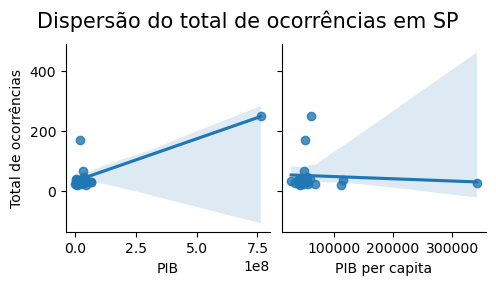

In [46]:
# Criando gráfico de correlação

ax = sns.pairplot(matr_corr_sp, y_vars = 'Total de ocorrências', x_vars = ['PIB', 'PIB per capita'], kind = 'reg')
ax.fig.suptitle('Dispersão do total de ocorrências em SP', fontsize = 15, y = 1.1)
#sns.set_palette('Dark')
#sns.set_style('white')
ax=ax

plt.savefig('Correlação PIB x acidentes.png')

In [49]:
# Removend outliers do DataFrame

outliers = ['São Paulo',
            'Santos',
            'Ribeirão Preto',
            'Macaé',
            'Rio de Janeiro',
            'Duque de Caxias',
            'Belo Horizonte',
            'Uberaba'            
           ]

pib_acidentes2 = pib_acidentes[~pib_acidentes['Município'].isin(outliers)]
pib_acidentes2.shape[0]

52

In [50]:
# Criando matrix de correlação para SP

matr_corr_sp = pib_acidentes2.groupby('UF').get_group('SP')[['Total de ocorrências', 'PIB', 'PIB per capita', 'N. atividade']]
matr_corr_sp.corr()

,Total de ocorrências,PIB,PIB per capita,N. atividade
Total de ocorrências,1.000000,0.034233,-0.173551,0.084428
PIB,0.034233,1.000000,0.243468,0.152621
PIB per capita,-0.173551,0.243468,1.000000,-0.624519
N. atividade,0.084428,0.152621,-0.624519,1.000000


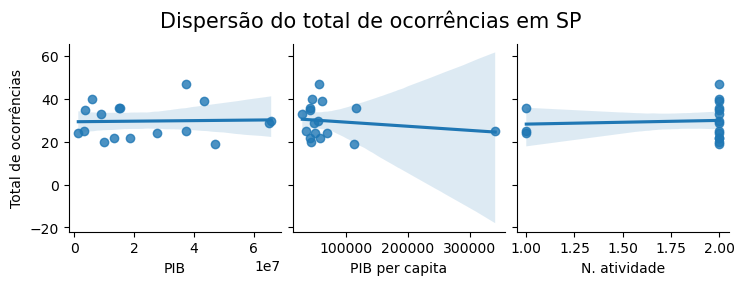

In [52]:
# Criando gráfico de correlação

ax = sns.pairplot(matr_corr_sp, y_vars = 'Total de ocorrências', x_vars = ['PIB', 'PIB per capita', 'N. atividade'], kind = 'reg')
ax.fig.suptitle('Dispersão do total de ocorrências em SP', fontsize = 15, y = 1.1)
#sns.set_palette('Dark')
#sns.set_style('white')
ax=ax

plt.savefig('Correlação PIB x acidentes_modificado.png')

## Observações finais

O presente documento apresentou uma análise exploratória dos registros de acidentes ambientais no Brasil reportados ao IBAMA.

Foram avaliados(as): a distribuição espacial dos acidentes por estado e por município, as descrições das ocorrências registradas e possível relação com indicadores socioeconômicos.

Entre as principais observações, pode-se destacar que os estados de Minas Gerais, São Paulo e Rio de Janeiro tiveram mais acidentes registrados, somando cerca de 63% das ocorrências de todo o país. Ainda mais, dentro de cada estado, os acidentes se distribuem entre alguns poucos municípios com grande número de casos e muitos municípios com poucos casos.

Os municípios mais concentradores de acidentes são as capitais de cada estado e alguns municípios menores mas com relevante atividade econômica, como Santos e Macaé.

A investigação das descrições das ocorrências por nuvem de palavras sugeriu que a cadeia produtiva de combustíveis fósseis está entre as principais causas dos acidentes reportados, associando-se tanto a transporte (rodoviário e hidroviário) quanto produção (plataformas e refinarias) de derivados de petróleo.

A investigação da correlação com indicadores socioeconômicos não revelou nenhum bom indicador que possa ser usado para prever a ocorrência de acidentes em outros municípios, provavelmente devido ao caráter aleatório e incidental de suas ocorrências 

Para concluir, espera-se que esta análise exploratória contribua para identificação das medidas de enfretamento mais promissoras, como por exemplo campanhas de conscientização e fiscalização desta cadeia produtiva e do transporte destes materiais perigosos no Sudeste do Brasil (especialmente em SP, MG e RJ).